# Рассмотрим способы преобразования SMILES в машиночитаемый вид

## Литература

[The DeepChem Project](https://deepchem.readthedocs.io/en/latest/index.html)

- [GitHub: dgl-lifesci/python/dgllife/utils/mol_to_graph.py](https://github.com/awslabs/dgl-lifesci/blob/master/python/dgllife/utils/mol_to_graph.py)

- [GitHub: deepchem/deepchem/feat/molecule_featurizers.py](https://github.com/deepchem/deepchem/blob/master/deepchem/feat/molecule_featurizers/mol_graph_conv_featurizer.py)

[Basic Molecular Representation for Machine Learning](https://towardsdatascience.com/basic-molecular-representation-for-machine-learning-b6be52e9ff76)

[Graph neural network (GNN) for molecular property prediction (SMILES format)](https://github.com/masashitsubaki/molecularGNN_smiles)

Optional:
[Graph Neural Networks Course: Deep Learning](https://hhaji.github.io/Deep-Learning/Graph-Neural-Networks/)



## RDKit
библиотека для хемоинформатики, которая предоставляет множество инструментов для работы с молекулами. Одним из таких инструментов является преобразование SMILES в машиночитаемый вид. В этом ноутбуке мы рассмотрим несколько способов преобразования SMILES в машиночитаемый вид с использованием RDKit.

In [2]:
%pip install rdkit

  Using cached rdkit-2023.9.5-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
Using cached rdkit-2023.9.5-cp310-cp310-win_amd64.whl (21.1 MB)
Note: you may need to restart the kernel to use updated packages.


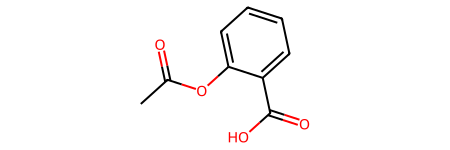

In [1]:
from rdkit import Chem

smiles = "O=C(C)Oc1ccccc1C(=O)O"  # Этанол в формате SMILES
molecule = Chem.MolFromSmiles(smiles)

# Теперь molecule является машиночитаемым объектом, с которым можно работать
molecule

## DeepChem
Библиотека для разработки и обучения моделей машинного обучения для химических данных. DeepChem предоставляет множество инструментов для работы с химическими данными, включая преобразование SMILES в машиночитаемый вид. В этом ноутбуке мы рассмотрим несколько способов преобразования SMILES в машиночитаемый вид с использованием DeepChem.

[Feature Engineering](https://deepchem.readthedocs.io/en/latest/get_started/tutorials.html#feature-engineering)


In [2]:
%pip install deepchem pyarrow -q

Note: you may need to restart the kernel to use updated packages.


In [11]:
import deepchem as dc

smiles = [
    "O=Cc1ccc(O)c(OC)c1",
    "CN1CCC[C@H]1c2cccnc2",
    "C1CCCCC1",
    "c1ccccc1",
    "CC(=O)O",
]
properties = [0.4, -1.5, 3.2, -0.2, 1.7]

In [12]:
mol_graph_conv_featurizer = dc.feat.MolGraphConvFeaturizer()
mol_graph_conv_features = mol_graph_conv_featurizer.featurize(smiles)
dataset = dc.data.NumpyDataset(
    X=mol_graph_conv_features, y=properties
)
dataset

<NumpyDataset X.shape: (5,), y.shape: (5,), w.shape: (5,), ids: [0 1 2 3 4], task_names: [0]>

In [13]:
conv_mol_featurizer = dc.feat.ConvMolFeaturizer()
conv_mol_features = conv_mol_featurizer.featurize(smiles)
train_dataset = dc.data.DiskDataset.from_numpy(conv_mol_features, properties, w=None, ids=None, tasks=None)
train_dataset

<DiskDataset X.shape: (5,), y.shape: (5,), w.shape: (5,), ids: [0 1 2 3 4], task_names: [0]>